### ***Lesion Segmentation with CA-Net***

System information

In [ ]:
# checking GPU availability
!nvidia-smi

## 1) Downloading project folder and extracting it!
Mount Google Drive from the Files Menu on the left and :-

- To Train the Model only, Select the Training section and start execution using Ctrl+F10 (**Run after**)

    > ***OR***

- To Run preprocess section **and** train the model Start execution using Ctrl+F9 (**Run all**) if you would like to also do the preprocessing part

In [ ]:
%cd /content/
!cp /content/drive/MyDrive/cv_project/CA-Netv3.zip /content/CA-Netv3.zip
!unzip CA-Netv3.zip -d /content/
%cd CA-Net

/content
Archive:  CA-Netv3.zip
   creating: /content/CA-Net/
   creating: /content/CA-Net/utils/
  inflating: /content/CA-Net/utils/dice_loss.py  
   creating: /content/CA-Net/utils/__pycache__/
  inflating: /content/CA-Net/utils/__pycache__/transform.cpython-37.pyc  
  inflating: /content/CA-Net/utils/__pycache__/transform.cpython-36.pyc  
  inflating: /content/CA-Net/utils/__pycache__/evaluation.cpython-37.pyc  
  inflating: /content/CA-Net/utils/__pycache__/evaluation.cpython-36.pyc  
  inflating: /content/CA-Net/utils/__pycache__/dice_loss.cpython-37.pyc  
  inflating: /content/CA-Net/utils/__pycache__/binary.cpython-36.pyc  
  inflating: /content/CA-Net/utils/__pycache__/dice_loss.cpython-36.pyc  
  inflating: /content/CA-Net/utils/__pycache__/binary.cpython-37.pyc  
  inflating: /content/CA-Net/utils/transform.py  
  inflating: /content/CA-Net/utils/binary.py  
  inflating: /content/CA-Net/utils/evaluation.py  
   creating: /content/CA-Net/__pycache__/
  inflating: /content/CA-N

***CA-Net is now the working directory!!***

## 2 Preprocessing Step (optional)

Steps in this section are optional, as the zip file we downloaded already has preprocessed data.
You can move on to the next section (Training) if you wish.

Downloading data

In [ ]:
%%time
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip -P data
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Test_Input.zip -P data
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip -P data 

--2020-12-14 10:55:01--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.161.3
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.161.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27402895 (26M) [application/zip]
Saving to: ‘data/ISIC2018_Task1_Training_GroundTruth.zip’

ISIC2018_Task1_Trai 100%[===================>]  26.13M  26.3MB/s    in 1.0s    

2020-12-14 10:55:03 (26.3 MB/s) - ‘data/ISIC2018_Task1_Training_GroundTruth.zip’ saved [27402895/27402895]

CPU times: user 13 ms, sys: 11 ms, total: 24 ms
Wall time: 1.43 s


Extracting all task 1 data to data directory

In [ ]:
%%time
!unzip -q data/ISIC2018_Task1-2_Test_Input.zip -d  data
!unzip -q data/ISIC2018_Task1-2_Training_Input.zip -d  data
!unzip -q data/ISIC2018_Task1_Training_GroundTruth.zip -d  data

In [ ]:
# Removing downloaded zip files to save space
!rm data/ISIC2018_Task1-2_Training_Input.zip
!rm data/ISIC2018_Task1-2_Test_Input.zip
!rm data/ISIC2018_Task1_Training_GroundTruth.zip

Running preprocess steps and validation directory creation 

In [ ]:
%%time
%cd /content/CA-Net
!python isic_preprocess.py
!python create_folder.py

/content/CA-Net
Successfully saved preprocessed data
Save folder1_train.list successfully
Save folder1_validation.list successfully
Save folder1_test.list successfully
Save folder2_train.list successfully
Save folder2_validation.list successfully
Save folder2_test.list successfully
Save folder3_train.list successfully
Save folder3_validation.list successfully
Save folder3_test.list successfully
Save folder4_train.list successfully
Save folder4_validation.list successfully
Save folder4_test.list successfully
Save folder5_train.list successfully
Save folder5_validation.list successfully
Save folder5_test.list successfully
CPU times: user 2.12 s, sys: 312 ms, total: 2.43 s
Wall time: 14min 58s


In [ ]:
# Remove raw data (optional)
# !rm -rf data/ISIC2018_Task1-2_Test_Input
# !rm -rf data/ISIC2018_Task1-2_Training_Input
# !rm -rf data/ISIC2018_Task1_Training_GroundTruth

## 3) Training Model

### Downloading pre-trained model

In [ ]:
%cd /content/CA-Net/
!wget https://www.dropbox.com/s/538ncmquiw7lcek/min_loss_ISIC2018_checkpoint.pth.tar -P saved_models/ISIC2018/folder1/Comp_Atten_Unet/

/content/CA-Net
--2020-12-14 11:28:56--  https://www.dropbox.com/s/538ncmquiw7lcek/min_loss_ISIC2018_checkpoint.pth.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/538ncmquiw7lcek/min_loss_ISIC2018_checkpoint.pth.tar [following]
--2020-12-14 11:28:56--  https://www.dropbox.com/s/raw/538ncmquiw7lcek/min_loss_ISIC2018_checkpoint.pth.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc4cf91fed74667c1a43247b9ca.dl.dropboxusercontent.com/cd/0/inline/BFB8geOxeBT8eI3kH1W-Sh7q8V8v0jcMENCeroeVwQiG9sinnPcya-_eAInZABx1SL_EP4dfmUcc5jsslZS8tHbcg9lmGH0eh1sXUa-iy4Y_BloMPWRYOa0-8-hTecBD3kU/file# [following]
--2020-12-14 11:28:56--  https://ucc4cf91fed74667c1a43247b9ca.dl.dropboxusercontent.com/cd/0/inline/BFB8geOxeBT8eI3kH1W-Sh7

### Train from scratch or checkpoint

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
## resume training from checkpoint

%cd /content/CA-Net
!python main.py --resume saved_models/ISIC2018/folder1/Comp_Atten_Unet/min_loss_ISIC2018_checkpoint.pth.tar \
                                --data ISIC2018 --epochs 294  --batch_size 16 --val_folder folder1 \
                                --id Comp_Atten_Unet

In [ ]:
## train from scratch

# %cd /content/CA-Net
# !python main.py --data ISIC2018 --epochs 300  --batch_size 16 --val_folder folder1 \
#                                 --id Comp_Atten_Unet

## 4) Validation

In [ ]:
!python validation.py --data ISIC2018 --val_folder folder1 --id Comp_Atten_Unet

## 5) Observations
- 1)
- 2)
- 3)

## 6) Inference

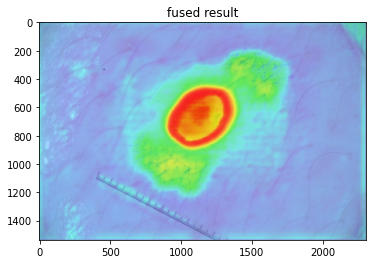

In [ ]:
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def map_scalar_to_color(x):
    x_list = [0.0, 0.25, 0.5, 0.75, 1.0]
    c_list = [[0, 0, 255],
              [0, 255, 255],
              [0, 255, 0],
              [255, 255, 0],
              [255, 0, 0]]
    for i in range(len(x_list)):
        if(x <= x_list[i + 1]):
            x0 = x_list[i]
            x1 = x_list[i + 1]
            c0 = c_list[i]
            c1 = c_list[i + 1]
            alpha = (x - x0)/(x1 - x0)
            c = [c0[j]*(1 - alpha) + c1[j] * alpha for j in range(3)]
            c = [int(item) for item in c]
            return tuple(c)


def get_fused_heat_map(image, att):
    [H, W] = image.size
    img = Image.new('RGB', image.size, (255, 0, 0))
    
    for i in range(H):
        for j in range(W):
            p0 = image.getpixel((i,j))
            alpha = att.getpixel((i,j))
            p1 = map_scalar_to_color(alpha)
            alpha = 0.3 + alpha*0.5
            p = [int(p0[c] * (1 - alpha) + p1[c]*alpha) for c in range(3)]
            p = tuple(p)
            img.putpixel((i, j), p)
    return img



image_name = "./result/atten_map/ISIC_0015937.jpg"
scalar_name = "./result/atten_map/25_2_8_wgt"
save_name = "./result/atten_map/15937_wgt3_fused"

img = Image.open(image_name)
# img = np.load(image_name)
# img = Image.fromarray(np.uint8(img*255))
# load the scalar map, and normalize the inteinsty to  0 - 1
scl = Image.open(scalar_name).convert('L')
scl = np.asarray(scl)
scl = cv2.resize(scl, dsize=(img.size[0], img.size[1]), interpolation=cv2.INTER_NEAREST)
scl_norm = np.asarray(scl, np.float32)/255
scl_norm = Image.fromarray(scl_norm)

# convert the scalar map to heat map, and fuse it with the original image
img_scl = get_fused_heat_map(img, scl_norm)
img_scl.save(save_name, format='png')

plt.imshow(img_scl), plt.title('fused result')
# plt.colorbar()
plt.show()

## 7) Compress and save to GDrive

In [ ]:
# Removing preprocessed data
# !rm -rf data/*

In [ ]:
# %cd /content 
# !zip -r CA-Netv3.zip CA-Net
# !cp CA-Netv3.zip /content/drive/MyDrive/cv_project/

In [ ]:
from google.colab import drive
drive.flush_and_unmount()